<a href="https://colab.research.google.com/github/ilgarbuzov/interview_tests/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels)= mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 188 146  79   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 140 202 199 255 144   0   0   0   0  11 135 157   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0 200 187 200 191 255  51   0   0  16 208 227 236  63   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0  18 233 193 206 186 219 

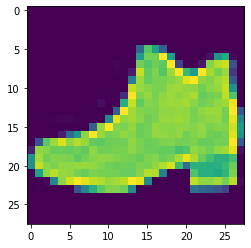

In [ ]:
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)
plt.imshow(training_images[15])
print(training_labels[15])
print(training_images[15])

In [13]:
# Normalize the data dimensions so that they are of approximately the same scale.

training_images = training_images/255.0
test_images = test_images/255.0

In [14]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = training_images.reshape(training_images.shape[0], w, h, 1)
x_test = test_images.reshape(test_images.shape[0], w, h, 1)

In [15]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)             

In [17]:
model.compile(optimizer= tf.keras.optimizers.Adam(), 
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, training_labels, epochs=5)
            

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3500 - accuracy: 0.8728
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3227 - accuracy: 0.8819
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3050 - accuracy: 0.8874
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2921 - accuracy: 0.8920
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2817 - accuracy: 0.8957


In [18]:
model.evaluate(x_test, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2613 - accuracy: 0.9031


[0.261295348405838, 0.9031000137329102]

In [19]:
classifications = model.predict(x_test)
print(classifications[15])

[3.12903438e-07 9.99987602e-01 2.77406560e-08 5.98989664e-06 5.74456681e-06 8.05908237e-13 3.63423908e-07 5.23099562e-14 6.42821185e-10 1.08132795e-13]


In [20]:
print(test_labels[15])

1
